In [51]:
import numpy as np

import matplotlib.pyplot as plt

In [37]:
def AND(x1,x2):
    
    # 1
#     w1 = 0.5
#     w2 = 0.5
#     b = -0.6
#     hf = (w1*x1) + (w2*x2) + b
    
    # 2 
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.6
    hf = np.sum(x*w)+b
    
    if  hf <= 0 :
        return 0
    else :
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(AND(data[0],data[1]))

0
0
0
1


In [42]:
def NAND(x1,x2):

    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.6
    hf = np.sum(x*w)+b
    
    if  hf <= 0 :
        return 0
    else :
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(NAND(data[0],data[1]))

1
1
1
0


In [43]:
def OR(x1,x2):

    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.1
    hf = np.sum(x*w)+b
    
    if  hf <= 0 :
        return 0
    else :
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(OR(data[0],data[1]))

0
1
1
1


In [48]:
# Q1
def XOR(x1,x2):

    N = NAND(x1,x2)
    O = OR(x1,x2)
    
    A = AND(N,O)
    
    return A

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(XOR(data[0],data[1]))

0
1
1
0


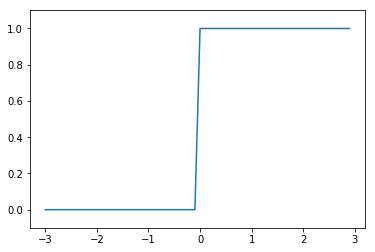

In [55]:
def myStep(x):
    return np.array(x>0, dtype = np.int)  # dtype을 int로 하면 False=0. True=1

x = np.arange(-3,3,0.1)
y = myStep(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

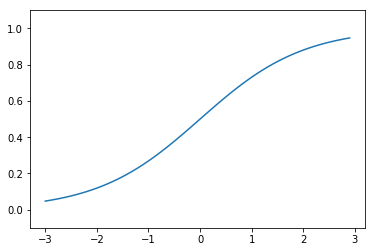

In [63]:
def mySig(x):
    return 1/(1+np.exp(-x))

x = np.arange(-3,3,0.1)
y = mySig(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

선형함수 : 출력이 입력값의 상수배만큼 변하는 함수
  f(x)=ax+b => 1개의 직선
  
비선형함수 : 1개의 직선으로는 그릴 수 없는 함수 (딥러닝에서 사용)

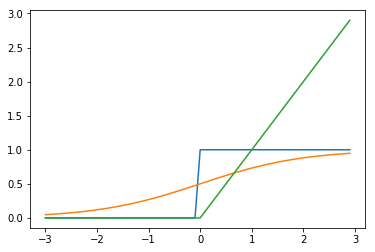

In [73]:
def myRelu(x):
    return np.maximum(0,x)

x = np.arange(-3,3,0.1)

y = myStep(x)
plt.plot(x,y)


y = mySig(x)
plt.plot(x,y)


y = myRelu(x)

plt.plot(x,y)

plt.show()

In [69]:
?np.max

In [86]:
# MLP 분류기 기반 타이타닉 데이터 분석
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [241]:
# 데이터 불러오기
train_df = pd.read_csv('data/titanic/train.csv') # 891  12
test_df = pd.read_csv('data/titanic/test.csv')   # 418  11

In [242]:
# train과 test 데이터 합치기
full_df = pd.concat([train_df, test_df], ignore_index=True)  # ignore_index = True
# 1309 * 12

In [243]:
# train_df.info()
# test_df.info()

In [244]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

In [245]:
# concat한 데이터 다시 분할
def extract_df():
    tr_df = full_df.loc[full_df['Survived'].notnull()]
    te_df = full_df.loc[full_df['Survived'].isnull()]
    
    return tr_df, te_df
    
train_df, test_df = extract_df()

In [246]:
# 호칭 추출

full_df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [247]:
# pat = re.compile(' (\w+).')

# for i in range(full_df.shape[0]):
#     print(re.search(pat, full_df['Name'][i]).group(1))

In [248]:
# 호칭 추출
title_sr = full_df['Name'].str.extract(' (\w+)\.', expand=False)

#expand=False => 시리즈타입으로

full_df['Title'] = title_sr

# 호칭별 성별 크로스 테이블
pd.crosstab(full_df['Title'], full_df['Sex'])

# title_sr.value_counts()

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [249]:
# 호칭 단순화
title_list = set(title_sr)
# 호칭을 매핑하기 위한 규칙 정의 딕셔너리
map_title_dic = {'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}
# 빈 딕셔너리 생성
working_dic ={}

for key in ['Lady','Countess', 'Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']:
    working_dic[key] = 'Rare'

In [250]:
# 두 딕셔너리 합치기
map_title_dic.update(working_dic)
map_title_dic

# 호칭을 딕셔너리로 치환
full_df['Title'] = full_df['Title'].replace(map_title_dic)
full_df['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Rare
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [251]:
set(list(full_df['Title']))

{'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare'}

In [252]:
# test데이터 id 저장
Subcol1 = test_df['PassengerId']

In [253]:
# 필요없는 열 제거
full_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [254]:
# 전처리한 데이터 다시 분할 
train_df, test_df = extract_df()

In [255]:
# 클래스별 생존률 
train_df.groupby('Pclass', as_index = False)[['Survived']].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [256]:
# 데이터프레임의 피처 리스트 추출
feature_list = list(full_df)

# 각 열별 중복제거 데이터 수 출력
for f in feature_list:
    print(f +' : '+ str(len(full_df[f].value_counts())))  

Age : 98
Embarked : 3
Fare : 281
Parch : 8
Pclass : 3
Sex : 2
SibSp : 7
Survived : 2
Title : 6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EA73CEE88>,
      dtype=object)

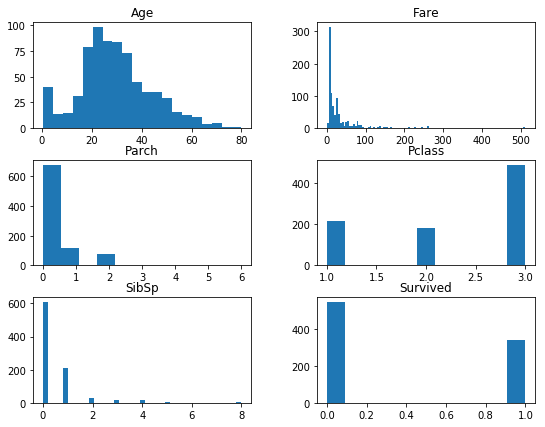

In [257]:
train_df.hist(figsize=(9,7), grid=False, bins='auto')

In [258]:
# 컬럼별 결측값 확인
test_df.isnull().sum()

# Embarked 수 확인
full_df['Embarked'].value_counts()

# 가장 많은 S값으로 결측값 대체
full_df['Embarked'].fillna('S', inplace=True)

# Fare 컬럼 중위수
full_df['Fare'].median()  # 14.4542

# Fare 컬럼결측치를 중위수로 대체
full_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [259]:
train_df, test_df = extract_df()

In [260]:
# 원핫 인코딩
full_df['Sex'] = full_df['Sex'].map({'female':0, 'male':1})

In [262]:
def onehot(df, feature_list):
    df = pd.get_dummies(df, columns=feature_list)
    return df

onehot_list = ['Title','Pclass','Embarked']

full_df = onehot(full_df, onehot_list)

In [277]:
train_df, test_df = extract_df()

In [290]:
# for x in list(train_df):
#     print(train_df['Survived'])
    #     if not x in ['Survived']

In [283]:
## 나이 결측치 보간 feat. NLP
x_train_age = full_df[[x for x in list(train_df) if not x in ['Survived']]]  # 1309 rows × 17 columns

In [288]:
# 나이 결측치가 있는 행들
x_pred_age = x_train_age.loc[x_train_age['Age'].isnull()]

In [289]:
# 나이 결측치가 없는 행들
x_train_age = x_train_age.loc[x_train_age['Age'].notnull()]

In [292]:
y_train_age = x_train_age['Age']

In [293]:
# x데이터에서 Age 제거
x_train_age.drop('Age', axis=1, inplace=True)
x_pred_age.drop('Age', axis=1, inplace=True)

In [299]:
from sklearn import preprocessing

scaler2 = preprocessing.StandardScaler().fit(x_train_age)

x_train_age = scaler2.transform(x_train_age)

x_pred_age = scaler2.transform(x_pred_age)

In [309]:
# Age 결측값이 있는행 인덱스 추출
Age_None_list = list(full_df[full_df['Age'].isnull()].index)
Age_None_list

[5,
 17,
 19,
 26,
 28,
 29,
 31,
 32,
 36,
 42,
 45,
 46,
 47,
 48,
 55,
 64,
 65,
 76,
 77,
 82,
 87,
 95,
 101,
 107,
 109,
 121,
 126,
 128,
 140,
 154,
 158,
 159,
 166,
 168,
 176,
 180,
 181,
 185,
 186,
 196,
 198,
 201,
 214,
 223,
 229,
 235,
 240,
 241,
 250,
 256,
 260,
 264,
 270,
 274,
 277,
 284,
 295,
 298,
 300,
 301,
 303,
 304,
 306,
 324,
 330,
 334,
 335,
 347,
 351,
 354,
 358,
 359,
 364,
 367,
 368,
 375,
 384,
 388,
 409,
 410,
 411,
 413,
 415,
 420,
 425,
 428,
 431,
 444,
 451,
 454,
 457,
 459,
 464,
 466,
 468,
 470,
 475,
 481,
 485,
 490,
 495,
 497,
 502,
 507,
 511,
 517,
 522,
 524,
 527,
 531,
 533,
 538,
 547,
 552,
 557,
 560,
 563,
 564,
 568,
 573,
 578,
 584,
 589,
 593,
 596,
 598,
 601,
 602,
 611,
 612,
 613,
 629,
 633,
 639,
 643,
 648,
 650,
 653,
 656,
 667,
 669,
 674,
 680,
 692,
 697,
 709,
 711,
 718,
 727,
 732,
 738,
 739,
 740,
 760,
 766,
 768,
 773,
 776,
 778,
 783,
 790,
 792,
 793,
 815,
 825,
 826,
 828,
 832,
 837,
 839,
 84

In [320]:
from sklearn.neural_network import MLPRegressor

mlr = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,50))

mlr.fit(x_train_age, y_train_age)

mlr.predict(x_pred_age)

mlr.score(x_train_age, y_train_age)  # 0.61

0.6143792405439942

In [325]:
# 예측값 비교
for a,b in zip(np.array(y_train_age), mlr.predict(x_train_age)):
    print(int(a),'  {:.0f}'.format(b))

22   23
38   42
26   24
35   32
35   28
54   40
2   2
27   29
14   20
4   1
58   34
20   28
39   36
14   24
55   35
2   7
31   30
35   30
34   32
15   23
28   44
8   6
38   41
19   21
40   48
66   33
28   43
42   36
21   28
18   21
14   14
40   35
27   32
3   1
19   23
18   31
7   3
21   29
49   41
29   33
65   41
21   30
28   27
5   8
11   8
22   27
38   26
45   36
4   6
29   36
19   28
17   15
26   25
32   33
16   12
21   18
26   22
32   30
25   29
0   5
30   23
22   28
29   28
28   41
17   30
33   34
16   28
23   24
24   28
29   28
20   29
46   35
26   25
59   29
71   43
23   40
34   38
34   37
28   24
21   38
33   28
37   25
28   28
21   24
38   28
47   39
14   15
22   28
20   22
17   13
21   28
70   34
29   33
24   23
2   12
21   26
32   31
32   30
54   38
12   10
24   29
45   29
33   27
20   29
47   32
29   33
25   32
23   29
19   20
37   36
16   28
24   39
22   24
24   32
19   33
18   33
19   40
27   29
9   9
36   35
42   39
51   40
22   36
55   28
40   38
51   41
16   23
30   2

In [330]:
# 결측치를 예측값으로 대체
full_df['Age'][Age_None_list] = mlr.predict(x_pred_age)

In [346]:
# train, test 데이터 나누기 

xtrain = full_df[full_df['Survived'].notnull()]
ytrain = full_df[full_df['Survived'].notnull()]['Survived']

In [349]:
xpredict = full_df[full_df['Survived'].isnull()]

In [350]:
xtrain.drop('Survived', axis=1, inplace=True)
xpredict.drop('Survived', axis=1, inplace=True)

In [353]:
scaler = preprocessing.StandardScaler().fit(xtrain)

xtrain = scaler.transform(xtrain)
xpredict = scaler.transform(xpredict)

In [396]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,25,30,25,30,17,20,50))

clf.fit(xtrain, ytrain)

clf.score(xtrain, ytrain)

0.898989898989899

In [378]:
subcol = clf.predict(xpredict).astype(int)

In [379]:
sm = pd.DataFrame({'PassengerId':Subcol1, 'Survived':subcol})
sm

,PassengerId,Survived
891,892,0
892,893,0
893,894,1
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [380]:
sm.to_csv('titanic_sub.csv', index=False)

In [ ]:
## MLP기반 iris 데이터 분류기 

In [401]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [402]:
# iris데이터 불러오기 
df = sns.load_dataset('iris')
# 정답데이터 
label = df['species']
df.drop('species', axis=1, inplace=True)

In [491]:
# 데이터셋 분할
xtrain, xtest, ytrain, ytest = train_test_split(df, label, test_size = 0.3, random_state = 777)

In [526]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(xtrain)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [552]:
# 모델 생성 및 테스트
for i in range(1,11):
    from sklearn.neural_network import MLPClassifier
    mlc = MLPClassifier(solver='lbfgs', alpha = 1e-5, hidden_layer_sizes=(75,25))
    mlc.fit(xtrain, ytrain)
    print(i,'회차')
    print('train score : {:.2f}'.format(mlc.score(xtrain, ytrain)))
    print('test score  : {:.2f}'.format(mlc.score(xtest, ytest)))

1 회차
train score : 1.00
test score  : 0.98
2 회차
train score : 1.00
test score  : 0.98
3 회차
train score : 1.00
test score  : 0.98
4 회차
train score : 1.00
test score  : 0.98
5 회차
train score : 1.00
test score  : 0.98
6 회차
train score : 1.00
test score  : 0.98
7 회차
train score : 1.00
test score  : 0.98
8 회차
train score : 1.00
test score  : 0.98
9 회차
train score : 1.00
test score  : 0.98
10 회차
train score : 1.00
test score  : 0.98


In [555]:
for i in range(1,11):
    from sklearn.neural_network import MLPClassifier
    mlc = MLPClassifier(solver='adam', alpha = 1e-5, hidden_layer_sizes=(75,25))
    mlc.fit(xtrain, ytrain)
    print(i,'회차')
    print('train score : {:.2f}'.format(mlc.score(xtrain, ytrain)))
    print('test score  : {:.2f}'.format(mlc.score(xtest, ytest)))

1 회차
train score : 0.98
test score  : 1.00
2 회차
train score : 0.97
test score  : 1.00
3 회차
train score : 0.97
test score  : 1.00
4 회차
train score : 0.97
test score  : 1.00
5 회차
train score : 0.97
test score  : 1.00
6 회차
train score : 0.99
test score  : 1.00
7 회차
train score : 0.97
test score  : 1.00
8 회차
train score : 0.97
test score  : 1.00
9 회차
train score : 0.97
test score  : 1.00
10 회차
train score : 0.97
test score  : 1.00


In [554]:
for i in range(1,11):
    from sklearn.neural_network import MLPClassifier
    mlc = MLPClassifier(solver='sgd', alpha = 1e-5, hidden_layer_sizes=(75,25))
    mlc.fit(xtrain, ytrain)
    print(i,'회차')
    print('train score : {:.2f}'.format(mlc.score(xtrain, ytrain)))
    print('test score  : {:.2f}'.format(mlc.score(xtest, ytest)))

1 회차
train score : 0.79
test score  : 0.89
2 회차
train score : 0.83
test score  : 0.91
3 회차
train score : 0.87
test score  : 0.93
4 회차
train score : 0.84
test score  : 0.87
5 회차
train score : 0.84
test score  : 0.82
6 회차
train score : 0.86
test score  : 0.89
7 회차
train score : 0.88
test score  : 0.91
8 회차
train score : 0.91
test score  : 0.96
9 회차
train score : 0.81
test score  : 0.91
10 회차
train score : 0.90
test score  : 0.91
